In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from plotnine import *
import pickle
from yellowbrick.model_selection import FeatureImportances

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/JoaoVitorBoer/Machine-Learning/main/Datasets/dataset3.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
total  = df.groupby(['Outcome']).agg( n = ('Outcome','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [9]:
total

,Outcome,n,perc
0,0,500,65.104167
1,1,268,34.895833


### Outliers

<AxesSubplot:>

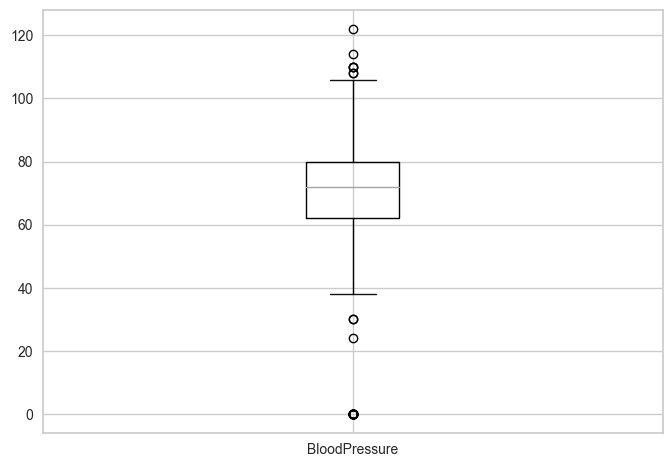

In [30]:
df[['BloodPressure']].boxplot()

### Target e feature

In [33]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

### Separar em treino e teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Tratar NaN

Se existir...

In [35]:
df.isna().sum().to_frame()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
